In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import random
from sklearn.decomposition import PCA
import seaborn as sn
from scipy import stats
import skfuzzy
from skfuzzy import control as ctrl
from sklearn.metrics import accuracy_score
from mat4py import loadmat
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
data = loadmat('emnist-digits-150.mat')
a = data['dataset']
b = a['DigitImage']
images = b['images']
labels = b['labels']
digits = np.array(images)
bwdigits = digits

In [3]:
class PreprocessData:
    def NomalizeData(Data):
        Data=np.array(Data)
        lenght = len(Data)
        normalizedData = []
        
        for i in range (lenght):
            normalizedData.append(float((Data[i] - min(Data) ) / ( max(Data) - min(Data)) ))
            
        return normalizedData
    
    def TestAndTrain(Data , PercentageOfTrainData):
        PercentageOfTrainData = float(PercentageOfTrainData / 100)
        Train_DataFrame = Data.sample(frac=PercentageOfTrainData)
        Test_DataFrame =Data.drop(Train_DataFrame.index)
        
        return Train_DataFrame , Test_DataFrame

In [4]:
label = []
for i in range (len(labels)):
    label.append(labels[i][0])
    

In [5]:
target = np.array(label)

#extract feature with flda 
lda = LDA(n_components=9)
NewDigits = lda.fit_transform(digits, target)
# TestData = lda.transform(TestData)
NewDigits.shape

(150, 9)

In [6]:
Data = pd.DataFrame(NewDigits, columns = ['f1','f2','f3','f4','f5','f6','f7','f8','f9'])
# Data = pd.DataFrame(newww, columns = ['f1','f2'])
Data['TARGET'] = label
Data['f1'] = Data['f1']+(abs(Data['f1'].min()))
Data['f2'] = Data['f2']+(abs(Data['f2'].min()))
Data['f3'] = Data['f3']+(abs(Data['f3'].min()))
Data['f4'] = Data['f4']+(abs(Data['f4'].min()))
Data['f5'] = Data['f5']+(abs(Data['f5'].min()))
Data['f6'] = Data['f6']+(abs(Data['f6'].min()))
Data['f7'] = Data['f7']+(abs(Data['f7'].min()))
Data['f8'] = Data['f8']+(abs(Data['f8'].min()))
Data['f9'] = Data['f9']+(abs(Data['f9'].min()))

Data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,TARGET
0,11.418653,3.751230,11.981976,4.738933,7.227988,5.790101,3.540473,5.297204,3.083235,0
1,2.983005,9.873780,7.820374,4.899786,6.678031,7.153805,6.736518,2.210640,5.091382,9
2,1.915534,7.037214,10.214927,5.326232,1.394789,4.904078,1.703361,3.640719,2.178594,7
3,4.702640,10.766252,6.857375,4.883366,6.744726,9.980633,6.107834,2.153912,7.599105,9
4,9.503366,7.044473,8.777936,9.279561,2.091095,0.413912,6.762935,8.149234,8.501042,2
...,...,...,...,...,...,...,...,...,...,...
145,0.902193,7.420871,9.918783,5.414055,2.086517,2.784350,1.375413,3.602570,1.697238,7
146,10.422931,11.372033,8.324603,6.109905,2.829766,10.555594,2.129882,7.025751,5.271638,8
147,12.395030,7.653852,5.336362,0.197707,3.036044,4.499732,5.889301,5.793696,3.356799,5
148,9.632242,6.647781,9.052528,8.965568,1.892256,0.867180,6.906464,8.442490,8.417439,2


In [7]:
Dataset = PreprocessData.TestAndTrain(Data , 80)

Datas = Dataset[0]
TestData = Dataset[1]
targetTest = TestData['TARGET']
TestData = TestData.drop('TARGET',axis=1)

In [8]:
memberships = []
fuzzyfiedsets = []
fuzzyfiedtarget = []

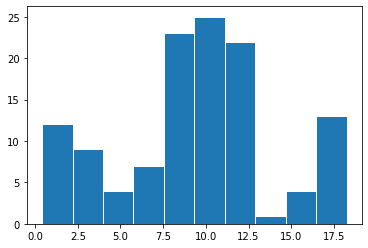

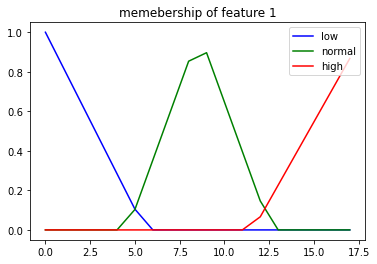

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


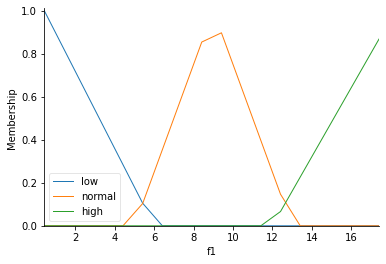

In [9]:
#feature one

fone= list(Datas['f1'])

plt.figure()
plt.hist(fone,edgecolor="white")
plt.show()
minn= np.min(fone)
maxx = np.max(fone)


dom = np.arange(minn, maxx)
onelow = skfuzzy.membership.trimf(dom ,[minn,minn,6] )
onenormal= skfuzzy.membership.trimf(dom ,[5,9,13] )
onehigh = skfuzzy.membership.trimf(dom ,[12,maxx,maxx])
fuzzyfiedsets.append([onelow,onenormal,onehigh])

plt.figure()
plt.plot(onelow , 'b',label='low')
plt.plot(onenormal , 'g',label='normal')
plt.plot(onehigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 1')
plt.legend()
plt.show()


f1 = ctrl.Antecedent(np.arange(minn, maxx), 'f1')

f1['low'] = skfuzzy.membership.trimf(dom ,[minn,minn,6] )
f1['normal']= skfuzzy.membership.trimf(dom ,[5,9,13] )
f1['high'] = skfuzzy.membership.trimf(dom ,[12,maxx,maxx])
memberships.append([f1['low'] , f1['normal'] ,f1['high']])

f1.view()



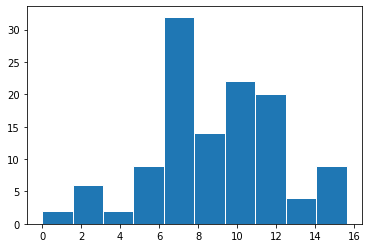

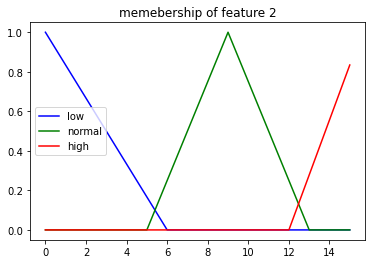

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


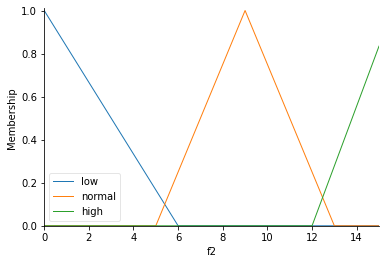

In [10]:
#feature two

ftwo= list(Datas['f2'])

plt.figure()
plt.hist(ftwo,edgecolor="white")
plt.show()
minn= np.min(ftwo)
maxx = np.max(ftwo)


dom = np.arange(minn, maxx)

twolow = skfuzzy.membership.trimf(dom ,[minn,minn,6] )
twonormal= skfuzzy.membership.trimf(dom ,[5,9,13] )
twohigh = skfuzzy.membership.trimf(dom ,[12,maxx,maxx])
fuzzyfiedsets.append([twolow,twonormal,twohigh])

plt.figure()
plt.plot(twolow , 'b',label='low')
plt.plot(twonormal , 'g',label='normal')
plt.plot(twohigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 2')
plt.legend()
plt.show()


f2 = ctrl.Antecedent(np.arange(minn, maxx), 'f2')

f2['low'] = skfuzzy.membership.trimf(f2.universe ,[minn,minn,6] )
f2['normal']= skfuzzy.membership.trimf(f2.universe ,[5,9,13] )
f2['high'] = skfuzzy.membership.trimf(f2.universe ,[12,maxx,maxx])
memberships.append([f2['low'] , f2['normal'] ,f2['high']])

f2.view()


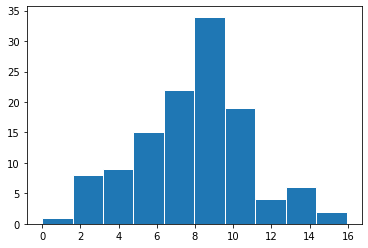

0.0


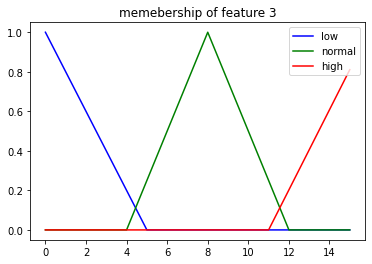

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


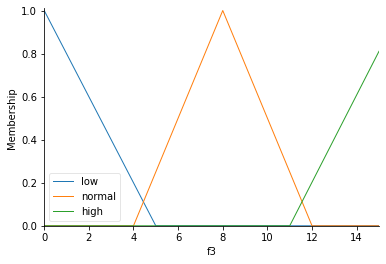

In [11]:
#feature three

fthree= list(Datas['f3'])

plt.figure()
plt.hist(fthree,edgecolor="white")
plt.show()
minn= np.min(fthree)
maxx = np.max(fthree)

print(minn)
dom = np.arange(minn, maxx,1)

threelow = skfuzzy.membership.trimf(dom ,[minn,minn,5] )
threenormal= skfuzzy.membership.trimf(dom ,[4,8,12] )
threehigh = skfuzzy.membership.trimf(dom ,[11,maxx,maxx])
fuzzyfiedsets.append([threelow,threenormal,threehigh])

plt.figure()
plt.plot(threelow , 'b',label='low')
plt.plot(threenormal , 'g',label='normal')
plt.plot(threehigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 3')
plt.legend()
plt.show()


f3 = ctrl.Antecedent(np.arange(minn, maxx), 'f3')

f3['low'] = skfuzzy.membership.trimf(dom,[minn,minn,5] )
f3['normal']= skfuzzy.membership.trimf(dom,[4,8,12] )
f3['high'] = skfuzzy.membership.trimf(dom ,[11,maxx,maxx])
memberships.append([f3['low'] , f3['normal'] ,f3['high']])

f3.view()


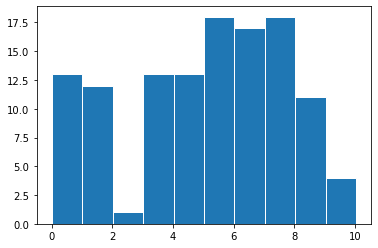

0.0


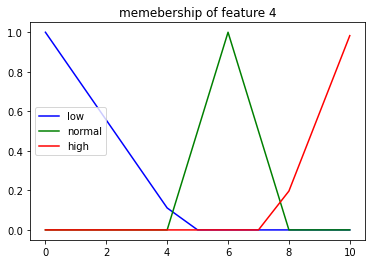

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


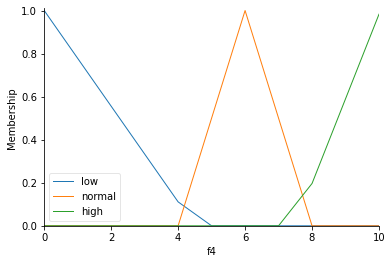

In [12]:
#feature four

ffour= list(Datas['f4'])

plt.figure()
plt.hist(ffour,edgecolor="white")
plt.show()
minn= np.min(ffour)
maxx = np.max(ffour)

print(minn)
dom = np.arange(minn, maxx,1)

fourlow = skfuzzy.membership.trimf(dom ,[minn,minn,4.5] )
fournormal= skfuzzy.membership.trimf(dom ,[4,6,8] )
fourhigh = skfuzzy.membership.trimf(dom ,[7.5,maxx,maxx])
fuzzyfiedsets.append([fourlow,fournormal,fourhigh])

plt.figure()
plt.plot(fourlow , 'b',label='low')
plt.plot(fournormal , 'g',label='normal')
plt.plot(fourhigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 4')
plt.legend()
plt.show()


f4 = ctrl.Antecedent(np.arange(minn, maxx), 'f4')

f4['low'] = skfuzzy.membership.trimf(dom,[minn,minn,4.5] )
f4['normal']= skfuzzy.membership.trimf(dom,[4,6,8] )
f4['high'] = skfuzzy.membership.trimf(dom ,[7.5,maxx,maxx])
memberships.append([f4['low'] , f4['normal'] ,f4['high']])

f4.view()

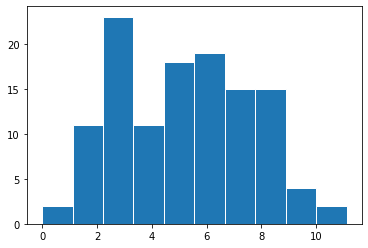

0.0


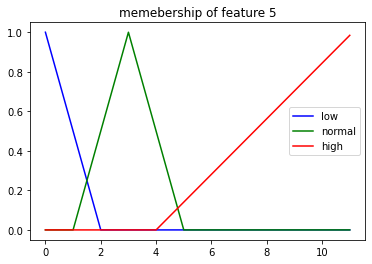

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


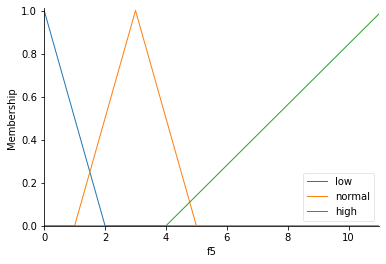

In [13]:
#feature five

ffive= list(Datas['f5'])

plt.figure()
plt.hist(ffive,edgecolor="white")
plt.show()
minn= np.min(ffive)
maxx = np.max(ffive)

print(minn)
dom = np.arange(minn, maxx,1)

fivelow = skfuzzy.membership.trimf(dom ,[minn,minn,2] )
fivenormal= skfuzzy.membership.trimf(dom ,[1,3,5] )
fivehigh = skfuzzy.membership.trimf(dom ,[4,maxx,maxx])
fuzzyfiedsets.append([fivelow,fivenormal,fivehigh])

plt.figure()
plt.plot(fivelow , 'b',label='low')
plt.plot(fivenormal , 'g',label='normal')
plt.plot(fivehigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 5')
plt.legend()
plt.show()


f5 = ctrl.Antecedent(np.arange(minn, maxx), 'f5')

f5['low'] = skfuzzy.membership.trimf(dom,[minn,minn,2] )
f5['normal']= skfuzzy.membership.trimf(dom,[1,3,5] )
f5['high'] = skfuzzy.membership.trimf(dom ,[4,maxx,maxx])
memberships.append([f5['low'] , f5['normal'] ,f5['high']])

f5.view()

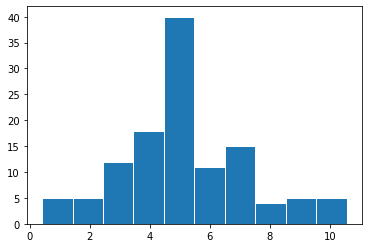

0.4139120289198699


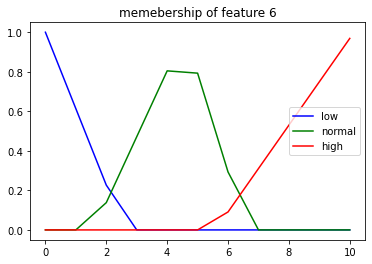

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


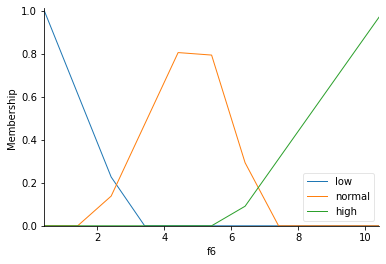

In [14]:
#feature six

fsix= list(Datas['f6'])

plt.figure()
plt.hist(fsix,edgecolor="white")
plt.show()
minn= np.min(fsix)
maxx = np.max(fsix)

print(minn)
dom = np.arange(minn, maxx,1)

sixlow = skfuzzy.membership.trimf(dom ,[minn,minn,3] )
sixnormal= skfuzzy.membership.trimf(dom ,[2,5,7] )
sixhigh = skfuzzy.membership.trimf(dom ,[6,maxx,maxx])
fuzzyfiedsets.append([sixlow,sixnormal,sixhigh])

plt.figure()
plt.plot(sixlow , 'b',label='low')
plt.plot(sixnormal , 'g',label='normal')
plt.plot(sixhigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 6')
plt.legend()
plt.show()


f6 = ctrl.Antecedent(np.arange(minn, maxx), 'f6')

f6['low'] = skfuzzy.membership.trimf(dom,[minn,minn,3] )
f6['normal']= skfuzzy.membership.trimf(dom,[2,5,7] )
f6['high'] = skfuzzy.membership.trimf(dom ,[6,maxx,maxx])
memberships.append([f6['low'] , f6['normal'] ,f6['high']])

f6.view()

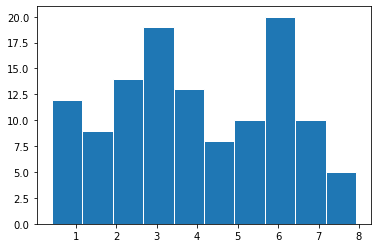

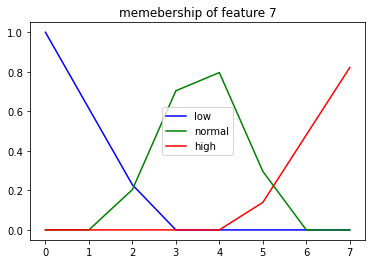

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


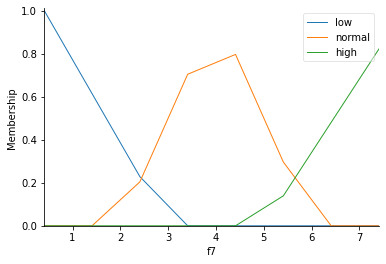

In [15]:
#feature seven

fseven= list(Datas['f7'])

plt.figure()
plt.hist(fseven,edgecolor="white")
plt.show()
minn= np.min(fseven)
maxx = np.max(fseven)

dom = np.arange(minn, maxx,1)

sevenlow = skfuzzy.membership.trimf(dom ,[minn,minn,3] )
sevennormal= skfuzzy.membership.trimf(dom ,[2,4,6] )
sevenhigh = skfuzzy.membership.trimf(dom ,[5,maxx,maxx])
fuzzyfiedsets.append([sevenlow,sevennormal,sevenhigh])

plt.figure()
plt.plot(sevenlow , 'b',label='low')
plt.plot(sevennormal , 'g',label='normal')
plt.plot(sevenhigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 7')
plt.legend()
plt.show()


f7 = ctrl.Antecedent(np.arange(minn, maxx), 'f7')

f7['low'] = skfuzzy.membership.trimf(dom,[minn,minn,3] )
f7['normal']= skfuzzy.membership.trimf(dom,[2,4,6] )
f7['high'] = skfuzzy.membership.trimf(dom ,[5,maxx,maxx])
memberships.append([f7['low'] , f7['normal'] ,f7['high']])

f7.view()

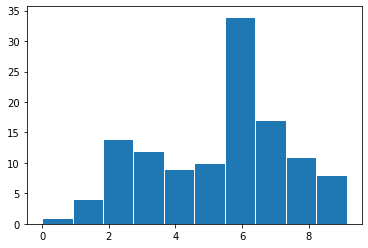

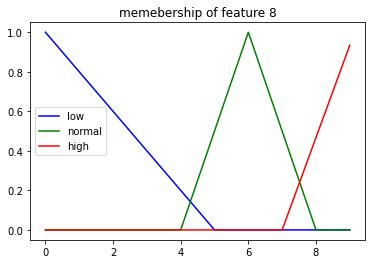

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


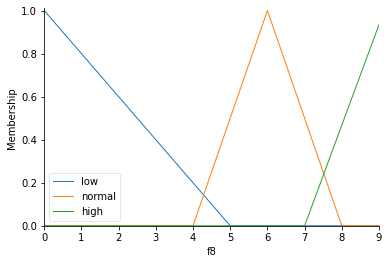

In [16]:
#feature eight

feight= list(Datas['f8'])

plt.figure()
plt.hist(feight,edgecolor="white")
plt.show()
minn= np.min(feight)
maxx = np.max(feight)

dom = np.arange(minn, maxx,1)

eightlow = skfuzzy.membership.trimf(dom ,[minn,minn,5] )
eightnormal= skfuzzy.membership.trimf(dom ,[4,6,8] )
eighthigh = skfuzzy.membership.trimf(dom ,[7,maxx,maxx])
fuzzyfiedsets.append([eightlow,eightnormal,eighthigh])

plt.figure()
plt.plot(eightlow , 'b',label='low')
plt.plot(eightnormal , 'g',label='normal')
plt.plot(eighthigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 8')
plt.legend()
plt.show()


f8 = ctrl.Antecedent(np.arange(minn, maxx), 'f8')

f8['low'] = skfuzzy.membership.trimf(dom,[minn,minn,5] )
f8['normal']= skfuzzy.membership.trimf(dom,[4,6,8] )
f8['high'] = skfuzzy.membership.trimf(dom ,[7,maxx,maxx])
memberships.append([f8['low'] , f8['normal'] ,f8['high']])

f8.view()

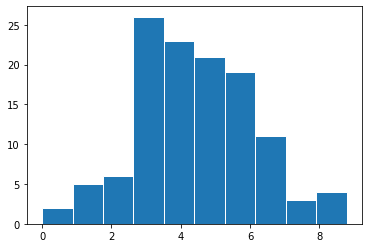

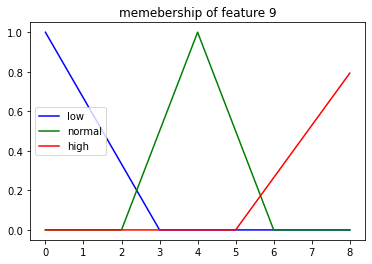

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


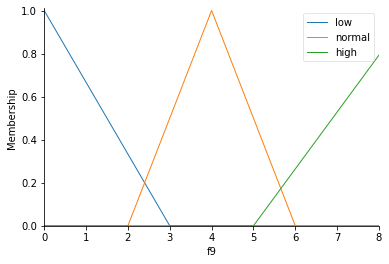

In [17]:
#feature nine

fnine= list(Datas['f9'])

plt.figure()
plt.hist(fnine,edgecolor="white")
plt.show()
minn= np.min(fnine)
maxx = np.max(fnine)

dom = np.arange(minn, maxx,1)

ninelow = skfuzzy.membership.trimf(dom ,[minn,minn,3] )
ninenormal= skfuzzy.membership.trimf(dom ,[2,4,6] )
ninehigh = skfuzzy.membership.trimf(dom ,[5,maxx,maxx])
fuzzyfiedsets.append([ninelow,ninenormal,ninehigh])

plt.figure()
plt.plot(ninelow , 'b',label='low')
plt.plot(ninenormal , 'g',label='normal')
plt.plot(ninehigh , 'r',label='high')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of feature 9')
plt.legend()
plt.show()


f9 = ctrl.Antecedent(np.arange(minn, maxx), 'f9')

f9['low'] = skfuzzy.membership.trimf(dom,[minn,minn,3] )
f9['normal']= skfuzzy.membership.trimf(dom,[2,4,6] )
f9['high'] = skfuzzy.membership.trimf(dom ,[5,maxx,maxx])
memberships.append([f9['low'] , f9['normal'] ,f9['high']])

f9.view()

In [18]:
# #TARGET 

# target= list(Datas['TARGET'])

# plt.figure()
# plt.hist(target,edgecolor="white")
# plt.show()
# minn= np.min(target)
# maxx = np.max(target)

# dom = np.arange(minn, maxx,1)
# trdom = dom
# targetzero = skfuzzy.membership.trimf(dom ,[0,0,1])
# targetone = skfuzzy.membership.trimf(dom ,[0.4,1,2] )
# targettwo= skfuzzy.membership.trimf(dom ,[1.4,2,3] )
# targetthree = skfuzzy.membership.trimf(dom ,[2.4,3,4])
# targetfour = skfuzzy.membership.trimf(dom ,[3.4,4,5])
# targetfive = skfuzzy.membership.trimf(dom ,[4.4,5,6])
# targetsix = skfuzzy.membership.trimf(dom ,[5.4,6,7])
# targetseven = skfuzzy.membership.trimf(dom ,[6.4,7,8])
# targeteight = skfuzzy.membership.trimf(dom ,[7.4,8,9])
# targetnine = skfuzzy.membership.trimf(dom ,[8.4,9,10])

# fuzzyfiedtarget.append([targetzero,targetone,targettwo,targetthree,targetfour,targetfive,targetsix,targetseven,targeteight,targetnine])

# plt.figure()
# plt.plot(targetzero , 'r',label='zero')
# plt.plot(targetone , 'b',label='one')
# plt.plot(targettwo , 'g',label='two')
# plt.plot(targetthree , 'y',label='three')
# plt.plot(targetfour , 'c',label='four')
# plt.plot(targetfive , 'm',label='five')
# plt.plot(targetsix , 'purple',label='six')
# plt.plot(targetseven , 'brown',label='seven')
# plt.plot(targeteight , 'navy',label='eight')
# plt.plot(targetnine , 'olive',label='nine')
# # plt.xticks(np.arange(0,60,5))
# plt.title('memebership of  target')
# plt.legend()
# plt.show()

# dom = np.arange(minn, maxx,0.1)
# target = ctrl.Consequent(dom, 'target')

# target['zero'] = skfuzzy.membership.trimf(dom ,[0,0,1])
# target['one'] = skfuzzy.membership.trimf(dom ,[0.4,1,2] )
# target['two']= skfuzzy.membership.trimf(dom ,[1.4,2,3] )
# target['three'] = skfuzzy.membership.trimf(dom ,[2.4,3,4])
# target['four'] = skfuzzy.membership.trimf(dom ,[3.4,4,5])
# target['five'] = skfuzzy.membership.trimf(dom ,[4.4,5,6])
# target['six'] = skfuzzy.membership.trimf(dom ,[5.4,6,7])
# target['seven'] = skfuzzy.membership.trimf(dom ,[6.4,7,8])
# target['eight'] = skfuzzy.membership.trimf(dom ,[7.4,8,9])
# target['nine'] = skfuzzy.membership.trimf(dom ,[8.4,9,10])
# memberships.append([target['zero'], target['one'] ,target['two'],target['three'],target['four'],target['five'],target['six'],target['seven'],target['eight'],target['nine']])

# target.view()

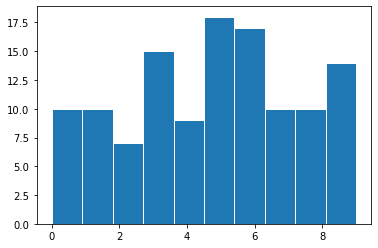

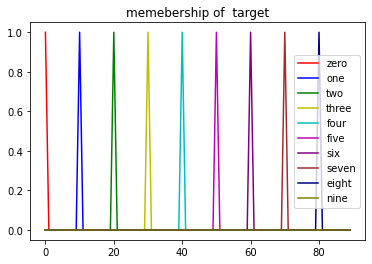

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


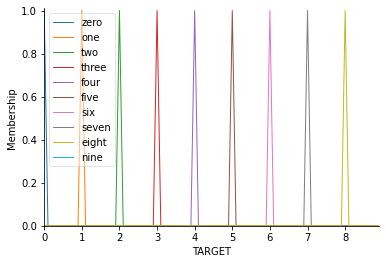

In [19]:
#TARGET 

target= list(Datas['TARGET'])

plt.figure()
plt.hist(target,edgecolor="white")
plt.show()
minn= np.min(target)
maxx = np.max(target)

dom = np.arange(minn, maxx,0.1)
trdom = dom
targetzero = skfuzzy.membership.trimf(dom ,[0,0,0])
targetone = skfuzzy.membership.trimf(dom ,[1,1,1] )
targettwo= skfuzzy.membership.trimf(dom ,[2,2,2] )
targetthree = skfuzzy.membership.trimf(dom ,[3,3,3])
targetfour = skfuzzy.membership.trimf(dom ,[4,4,4])
targetfive = skfuzzy.membership.trimf(dom ,[5,5,5])
targetsix = skfuzzy.membership.trimf(dom ,[6,6,6])
targetseven = skfuzzy.membership.trimf(dom ,[7,7,7])
targeteight = skfuzzy.membership.trimf(dom ,[8,8,8])
targetnine = skfuzzy.membership.trimf(dom ,[9,9,9])

fuzzyfiedtarget.append([targetzero,targetone,targettwo,targetthree,targetfour,targetfive,targetsix,targetseven,targeteight,targetnine])

plt.figure()
plt.plot(targetzero , 'r',label='zero')
plt.plot(targetone , 'b',label='one')
plt.plot(targettwo , 'g',label='two')
plt.plot(targetthree , 'y',label='three')
plt.plot(targetfour , 'c',label='four')
plt.plot(targetfive , 'm',label='five')
plt.plot(targetsix , 'purple',label='six')
plt.plot(targetseven , 'brown',label='seven')
plt.plot(targeteight , 'navy',label='eight')
plt.plot(targetnine , 'olive',label='nine')
# plt.xticks(np.arange(0,60,5))
plt.title('memebership of  target')
plt.legend()
plt.show()


TARGET = ctrl.Consequent(dom, 'TARGET')

TARGET['zero'] = skfuzzy.membership.trimf(dom ,[0,0,0])
TARGET['one'] = skfuzzy.membership.trimf(dom ,[1,1,1] )
TARGET['two']= skfuzzy.membership.trimf(dom ,[2,2,2] )
TARGET['three'] = skfuzzy.membership.trimf(dom ,[3,3,3])
TARGET['four'] = skfuzzy.membership.trimf(dom ,[4,4,4])
TARGET['five'] = skfuzzy.membership.trimf(dom ,[5,5,5])
TARGET['six'] = skfuzzy.membership.trimf(dom ,[6,6,6])
TARGET['seven'] = skfuzzy.membership.trimf(dom ,[7,7,7])
TARGET['eight'] = skfuzzy.membership.trimf(dom ,[8,8,8])
TARGET['nine'] = skfuzzy.membership.trimf(dom ,[9,9,9])
memberships.append([TARGET['zero'], TARGET['one'] ,TARGET['two'],TARGET['three'],TARGET['four'],TARGET['five'],TARGET['six'],TARGET['seven'],TARGET['eight'],TARGET['nine']])

TARGET.view()

In [20]:
a = np.array(fuzzyfiedsets,dtype=object)
print(a.shape)
memberships
b = np.array(memberships,dtype=object)
print(b.shape)
b

(9, 3)
(10,)


array([list([f1[low], f1[normal], f1[high]]),
       list([f2[low], f2[normal], f2[high]]),
       list([f3[low], f3[normal], f3[high]]),
       list([f4[low], f4[normal], f4[high]]),
       list([f5[low], f5[normal], f5[high]]),
       list([f6[low], f6[normal], f6[high]]),
       list([f7[low], f7[normal], f7[high]]),
       list([f8[low], f8[normal], f8[high]]),
       list([f9[low], f9[normal], f9[high]]),
       list([TARGET[zero], TARGET[one], TARGET[two], TARGET[three], TARGET[four], TARGET[five], TARGET[six], TARGET[seven], TARGET[eight], TARGET[nine]])],
      dtype=object)

In [21]:
AllRules = []
for  row  in  Datas.iterrows():
    rule=[]
    for  i , c in enumerate(Datas.columns):
        if(i !=9):
            dom = np.arange(Datas[c].min(), Datas[c].max() ,1)

            lowship = skfuzzy.interp_membership(dom ,fuzzyfiedsets[i][0],row[1][c])
            normalship = skfuzzy.interp_membership(dom ,fuzzyfiedsets[i][1],row[1][c])
            highship = skfuzzy.interp_membership(dom ,fuzzyfiedsets[i][2],row[1][c])
            rule.append(np.argmax([lowship , normalship , highship]))
    rule.append(row[1]['TARGET'])
    if (rule in AllRules):
        continue
    AllRules.append(rule)
        


In [22]:
def defineRule(AllRules , memberships,fuzzyfiedsets):
    rules = []
    for i in range (len(AllRules)):
        rl = []
        for j in range(len(AllRules[i])):
            # print(type(AllRules[i][j]))
            rl.append(memberships[j][int(AllRules[i][j])])
        rules.append(rl)
    return rules
                
    
    

In [23]:
def setrules(rules):
    label_rules = []
    for i in range(len(rules)):
        rule = ctrl.Rule(rules[i][0] & rules[i][1] & rules[i][2] & rules[i][3] & rules[i][4] & rules[i][5]& rules[i][6]& rules[i][7] & rules[i][8] , rules[i][9] )
        # rule = ctrl.Rule(rules[i][0] & rules[i][1] , rules[i][2]  )
        label_rules.append(rule)
    return label_rules

In [24]:
rules = defineRule(AllRules,memberships,fuzzyfiedsets)
len(rules)

80

In [25]:
label_rules = setrules(rules)


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

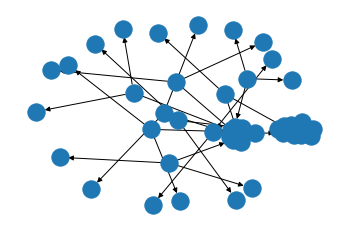

In [26]:
label_rules[15].view()

In [27]:
tipping_ctrl = ctrl.ControlSystem(label_rules)
label_result = ctrl.ControlSystemSimulation(tipping_ctrl)
memberships

[[f1[low], f1[normal], f1[high]],
 [f2[low], f2[normal], f2[high]],
 [f3[low], f3[normal], f3[high]],
 [f4[low], f4[normal], f4[high]],
 [f5[low], f5[normal], f5[high]],
 [f6[low], f6[normal], f6[high]],
 [f7[low], f7[normal], f7[high]],
 [f8[low], f8[normal], f8[high]],
 [f9[low], f9[normal], f9[high]],
 [TARGET[zero],
  TARGET[one],
  TARGET[two],
  TARGET[three],
  TARGET[four],
  TARGET[five],
  TARGET[six],
  TARGET[seven],
  TARGET[eight],
  TARGET[nine]]]

/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/saeed

[0.23416498058283117, -1, -1, 0.047549959976390645, 7.0, 2.0, -1, -1, 7.999999999999998, 4.0, 0.04768224643700595, 0.04821770467707693, 3.0000000000000004, 7.000000000000002, 8.0, 4.000000000000001, 5.0, 0.04676105388610736, 1.0, 3.0000000000000004, -1, 0.0464882492675098, 5.0, 3.0000000000000004, 6.000000000000001, 0.04448047310258163, 3.0, 7.999999999999999, 8.0, 7.000000000000001]


/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/saeed/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


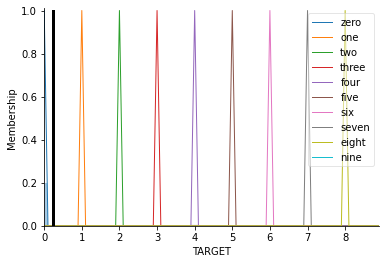

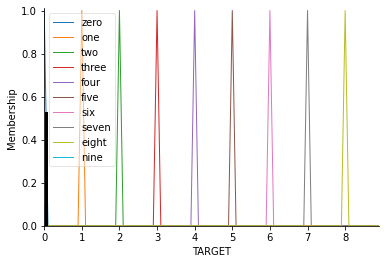

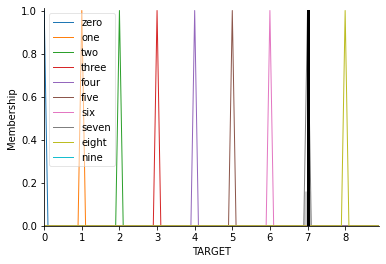

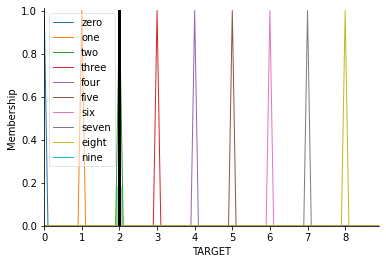

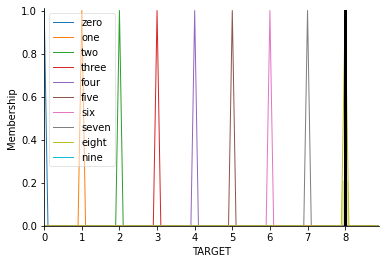

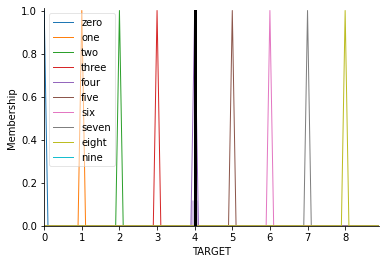

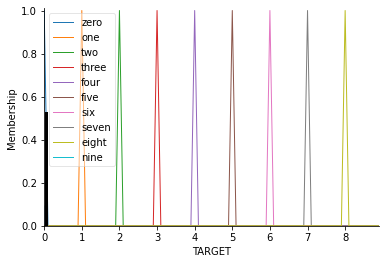

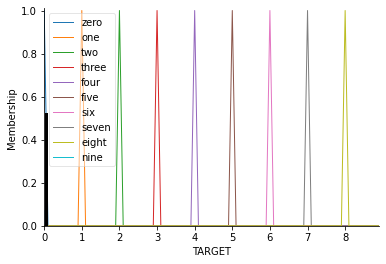

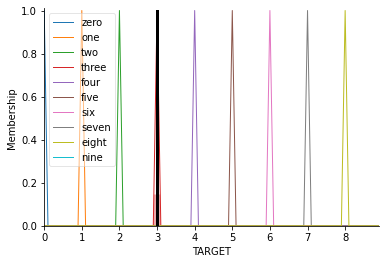

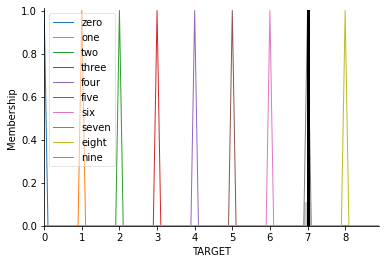

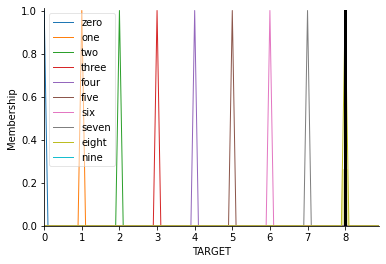

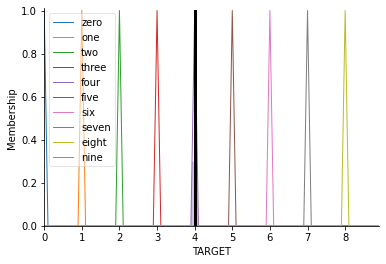

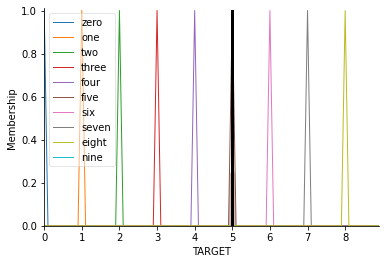

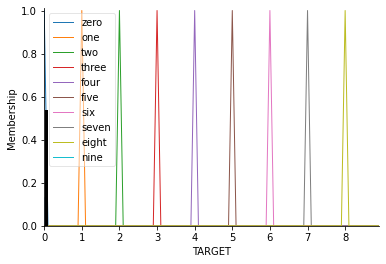

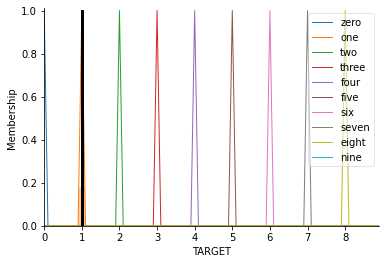

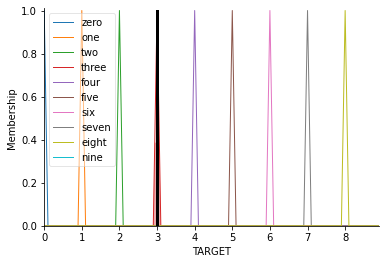

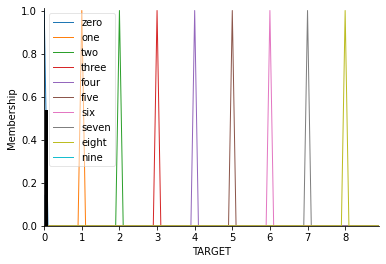

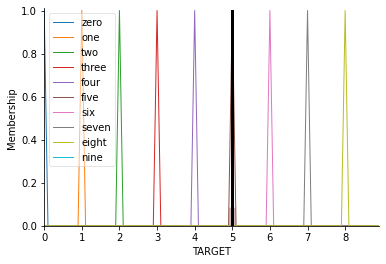

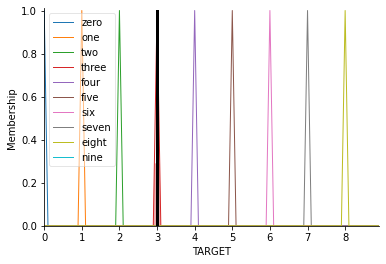

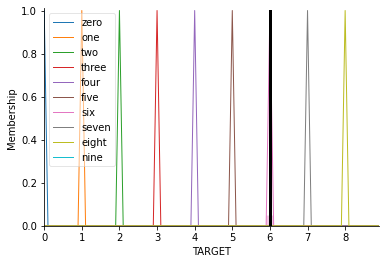

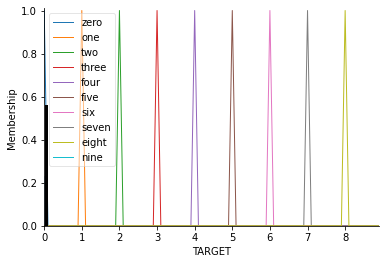

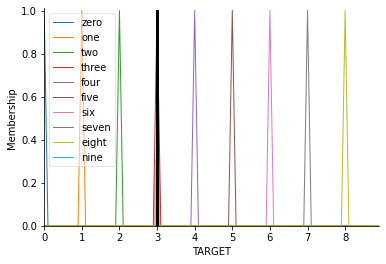

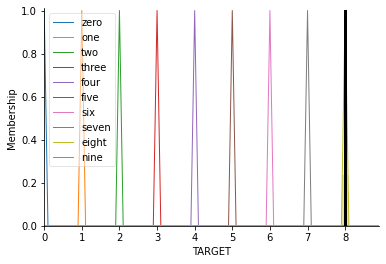

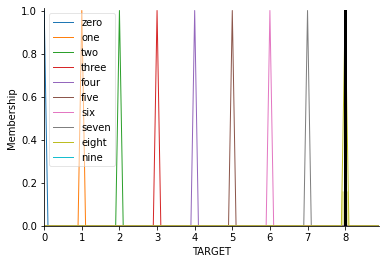

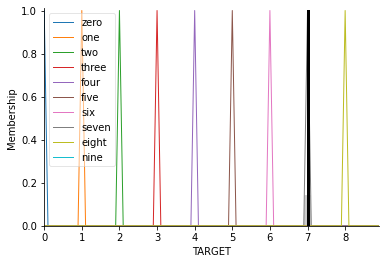

In [28]:
count = 0
numbers = []
norl = []
for j, test in TestData.iterrows():
    count = count+1
    label_result.input['f1'] = test['f1']
    label_result.input['f2'] = test['f2']
    label_result.input['f3'] = test['f3']
    label_result.input['f4'] = test['f4']
    label_result.input['f5'] = test['f5']
    label_result.input['f6'] = test['f6']
    label_result.input['f7'] = test['f7']
    label_result.input['f8'] = test['f8']
    label_result.input['f9'] = test['f9']
    try:

        label_result.compute()
        
        numbers.append(label_result.output['TARGET'])
        TARGET.view(sim=label_result)

    except:
        numbers.append(-1)
print(numbers)

In [29]:
def prediction(predict , fuzzyfiedtarget,dom):
    pred = []
    for i in range (len(predict)):
        if(predict[i]!= -1):
            a=[]
            targt0 = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][0],predict[i])
            a.append(targt0)
            targt1  = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][1],predict[i])
            a.append(targt1)
            targt2 = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][2],predict[i])
            a.append(targt2)
            targt3  = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][3],predict[i])
            a.append(targt3)
            targt4 = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][4],predict[i])
            a.append(targt4)
            targt5  = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][5],predict[i])
            a.append(targt5)
            targt6 = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][6],predict[i])
            a.append(targt6)
            targt7  = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][7],predict[i])
            a.append(targt7)
            targt8  = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][8],predict[i])
            # print(targt7)
            a.append(targt8)
            targt9 = skfuzzy.interp_membership(dom ,fuzzyfiedtarget[0][9],predict[i])
            a.append(targt9)
            
            
            pred.append(np.argmax(a))
        else:
            pred.append(6)
            



            
            
    return pred

In [30]:
predicted = prediction(numbers , fuzzyfiedtarget,trdom)


In [31]:
acc = accuracy_score(targetTest, predicted)

In [32]:
print('the accuracy is  = ',acc*100)

the accuracy is  =  83.33333333333334
